# Part II - Loan Data from Prosper
## by Isaac Ninson

## Investigation Overview


> I would like to investigate the impact of Prosper Rating on some of the other variable since the Rating has been found to be critical in determining Loan Amount a Borrower can secure as well as the APR a Borrower can get.



## Dataset Overview

> The dataset is made up of 61482 rows with 14 columns. This is the same data I used in Part 1 of this project. Data is indexed by the unique member key of each borrower. The 14 columns is made up of 9 categorical data and 5 numerical data. Data has already been cleaned.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [38]:
# load in the dataset into a pandas dataframe
df_newdata=pd.read_csv(r'C:\Users\Isaac Ninson\Desktop\New Python\My_Udacity_Project\Final Project\My_New_Data.csv')
df_newdata

,ListingCategory,EmploymentStatus,IsBorrowerHomeowner,IncomeVerifiable,ProsperRating,StatedMonthlyIncome,IncomeRange,DebtToIncomeRatio,LoanOriginalAmount,LoanTerm,MonthlyLoanPayment,BorrowerAPR,LoanOriginationQuarter,LoanOriginationYear
0,Home Improvement,Employed,False,True,A,6125.000000,"$50,000-74,999",0.18,10000,Medium Term,318.93,0.12016,Q1,2014
1,Motorcycle,Employed,True,True,A,2875.000000,"$25,000-49,999",0.15,10000,Medium Term,321.45,0.12528,Q4,2012
2,Home Improvement,Employed,True,True,D,9583.333333,"$100,000+",0.26,15000,Medium Term,563.97,0.24614,Q3,2013
3,Debt Consolidation,Employed,True,True,B,8333.333333,"$100,000+",0.36,15000,Long Term,342.37,0.15425,Q4,2013
4,Debt Consolidation,Employed,False,True,E,2083.333333,"$25,000-49,999",0.27,3000,Medium Term,122.67,0.31032,Q2,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61477,Home Improvement,Employed,False,True,E,4333.333333,"$50,000-74,999",0.05,2500,Medium Term,101.25,0.30285,Q3,2013
61478,Business,Employed,False,True,B,8146.666667,"$75,000-99,999",0.28,25000,Long Term,565.50,0.15016,Q1,2014
61479,Debt Consolidation,Employed,True,True,C,4333.333333,"$50,000-74,999",0.13,10000,Medium Term,364.74,0.22354,Q2,2013
61480,Debt Consolidation,Employed,True,True,D,2875.000000,"$25,000-49,999",0.51,10000,Long Term,273.35,0.23984,Q4,2013


In [25]:
# Store the correct variable orders in a dictionary
order_dict = {'EmploymentStatus':['Employed','Self-employed','Retired','Other'],
              'IncomeRange':['$0', '$1-24,999', '$25,000-49,999','$50,000-74,999', '$75,000-99,999', '$100,000+'],
              'ProsperRating':['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
              'LoanTerm':['Short Term','Medium Term','Long Term'],
              'LoanOriginationQuarter':['Q1','Q2','Q3','Q4'],
              'LoanOriginationYear':['2009','2010','2011','2012','2013','2014']}

# Assign each column to the proper order
for key, value in order_dict.items():
    correct_order = pd.api.types.CategoricalDtype(categories=value, ordered=True)
    df_newdata[key] = df_newdata[key].astype(correct_order)

# Verify changes
df_newdata[order_dict.keys()].dtypes

EmploymentStatus          category
IncomeRange               category
ProsperRating             category
LoanTerm                  category
LoanOriginationQuarter    category
LoanOriginationYear       category
dtype: object

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Prosper Rating

> Prosper Rating is positively distributed. 65.8% of Borrowers were rated from AA to C. Approximatly 30% of Borrowers had rating C which was the highest recorded rating among the Borrowers. 


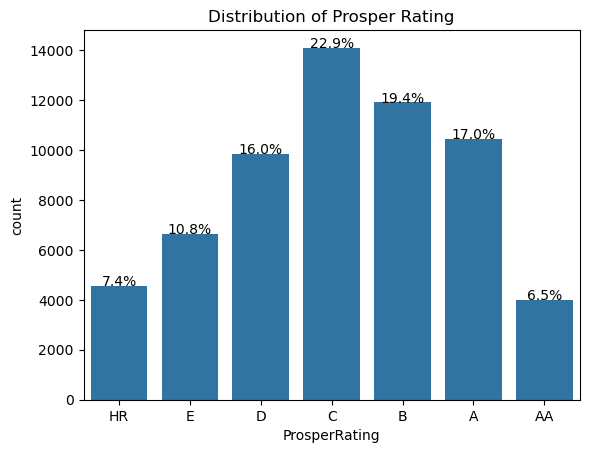

In [27]:
base_color = sb.color_palette()[0]
percentage = df_newdata.ProsperRating.value_counts(normalize=True).sort_index()*100
ax = sb.countplot(data=df_newdata,x='ProsperRating',color=base_color,order=['HR','E','D','C','B','A','AA'])
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.05
    ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.title('Distribution of Prosper Rating')
plt.show()

## Impact of Rating on APR Base on Borrower's Employment Status

> Employed who are rated between AA, A or B had lower APR compared to the self-employed but employed borrowers rated below B had higher APR compared to the Self-employed. The retired genrally had the lowest APR for ratings AA,A or B but the highest APR for the low ratings.

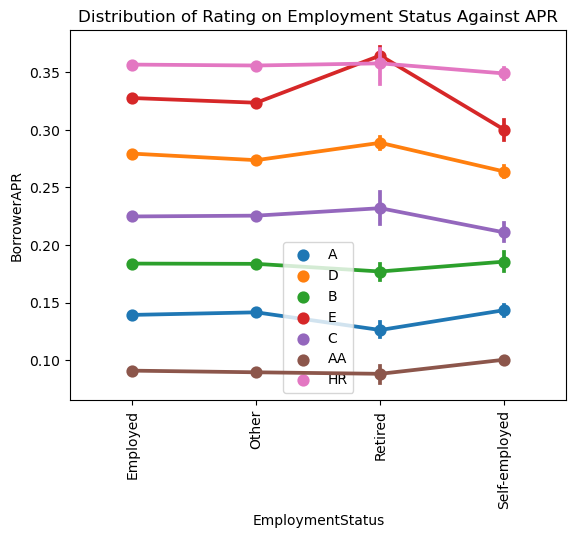

In [39]:
sb.pointplot(data=df_newdata,x='EmploymentStatus', y='BorrowerAPR',order=None,hue='ProsperRating',linestyles = '-')
plt.legend()
plt.xticks(rotation=90)
plt.title('Distribution of Rating on Employment Status Against APR')
plt.show()

## Impact of Rating on Loan Amount and Loan Term

> As rating increases, a borrower has the capacity to secure high loan amount with an increaseed loan term. At high ratings AA, A or B, Borrowers had the same average amount for Long Term Loans meaning at these ratings, Borrowers have access to almost same range of loan amounts.

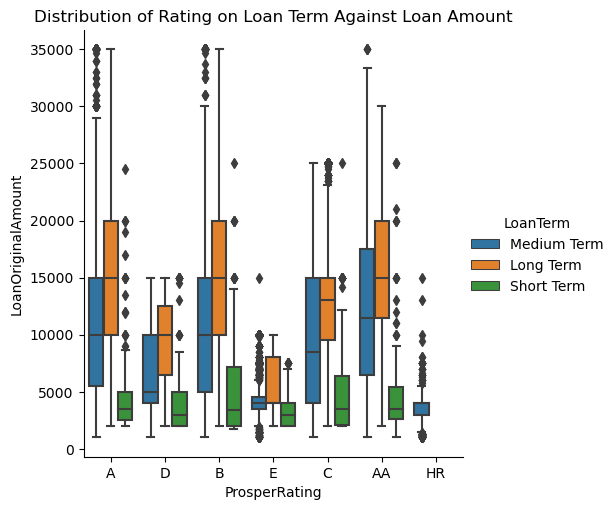

In [40]:
sb.catplot(data=df_newdata, x="ProsperRating", y="LoanOriginalAmount", hue="LoanTerm", kind="box")
plt.title('Distribution of Rating on Loan Term Against Loan Amount')
plt.show()

## Impact of Homeowner on Rating and Loan Amount
> Homeowner doesn't influence Rating. However, irrespective of a borrower's rating, being a homeowner secures a borrower higher loan amount done non-homeowners.

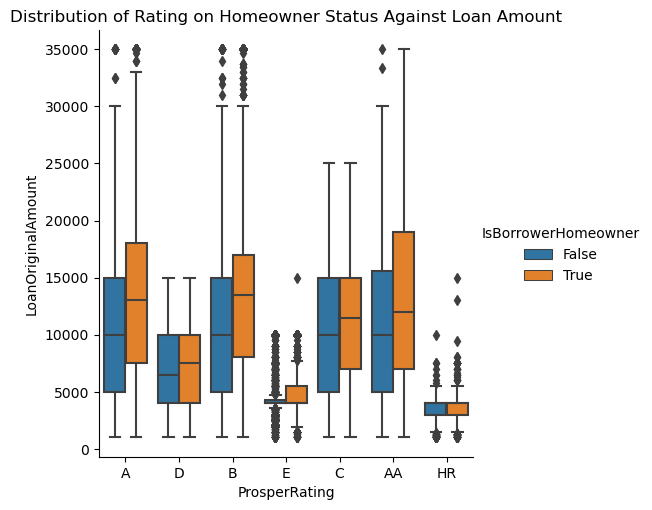

In [41]:
sb.catplot(data=df_newdata, x="ProsperRating", y="LoanOriginalAmount", hue="IsBorrowerHomeowner", kind="box")
plt.title('Distribution of Rating on Homeowner Status Against Loan Amount')
plt.show()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [51]:
!jupyter nbconvert Part_II_Loan_Data_From_Prosper.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Loan_Data_From_Prosper.ipynb to slides
[NbConvertApp] Writing 781435 bytes to Part_II_Loan_Data_From_Prosper.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Isaac Ninson\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Isaac Ninson\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\Isaac Ninson\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Isaac Ninson\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Isaac Ninson\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 